In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
x=df.drop(columns='math_score',axis=1)

In [5]:
print(df['gender'].dtypes)

object


In [6]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
print("categories in 'gender' variables :     ",end="")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variables :     ",end="")
print(df['race_ethnicity'].unique()) 

print("categories in 'parental_level_of_educationr' variables :     ",end="")
print(df['parental_level_of_education'].unique()) 

print("categories in 'lunch' variables :     ",end="")
print(df['lunch'].unique())
 
print("categories in 'test_preparation_course' variables :  ",end="")
print(df['test_preparation_course'].unique())

categories in 'gender' variables :     ['female' 'male']
categories in 'race_ethnicity' variables :     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_educationr' variables :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variables :     ['standard' 'free/reduced']
categories in 'test_preparation_course' variables :  ['none' 'completed']


In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x.shape,x_train.shape, x_test.shape

((1000, 7), (800, 7), (200, 7))

In [9]:
# Create Column Transformer with 3 types of transformers
# num_features = x.select_dtypes(exclude="object").columns
# cat_features = x.select_dtypes(include="object").columns

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = x_train.select_dtypes(exclude="object").columns
cat_features = x_train.select_dtypes(include="object").columns

In [11]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=
    [
       ("OneHotEncoder", oh_transformer, cat_features),
       ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [15]:
x_train_scaled=preprocessor.fit_transform(x_train)
x_test_scaled=preprocessor.transform(x_test)

In [16]:
x_train_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.03079054,  0.43405338],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.9302895 ,  0.96470125],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.34544287,  1.1636942 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.52274728, -1.02522827],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
        -1.49143847, -1.02522827],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.48382733,  1.36268716]], shape=(800, 14))

In [17]:
x_train_scaled.shape,x_test_scaled.shape

((800, 14), (200, 14))

In [18]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_sc=r2_score(true,predicted)
    return mae,rmse,r2_sc

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.5719
- Mean Absolute Error: 4.4595
- R2 Score: 0.8623
-----------------------

## Results

In [20]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Names','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Names,R2_score
2,Ridge,0.880450
0,Linear Regression,0.880433
5,Random Forest Regressor,0.850616
6,AdaBoost Regressor,0.847194
1,Lasso,0.825446
3,K-Neighbors Regressor,0.777305
4,Decision Tree,0.730067


## Linear Regression

In [21]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train_scaled,y_train)
y_predict=lin_model.predict(x_test_scaled)
score=r2_score(y_test,y_predict)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 88.04


## plot y_test and y_predict

Text(0, 0.5, 'Predicted values')

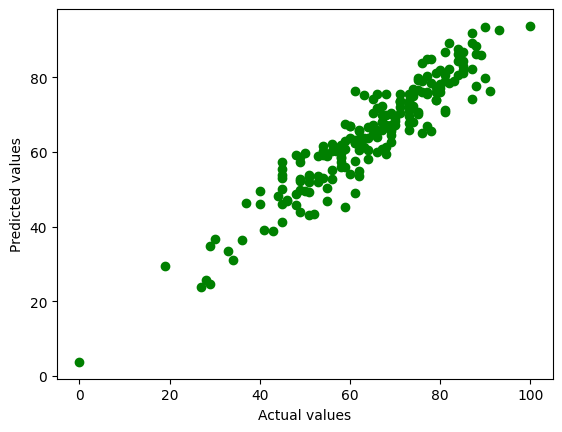

In [22]:
plt.scatter(y_test,y_predict,color='g')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'predicted score')

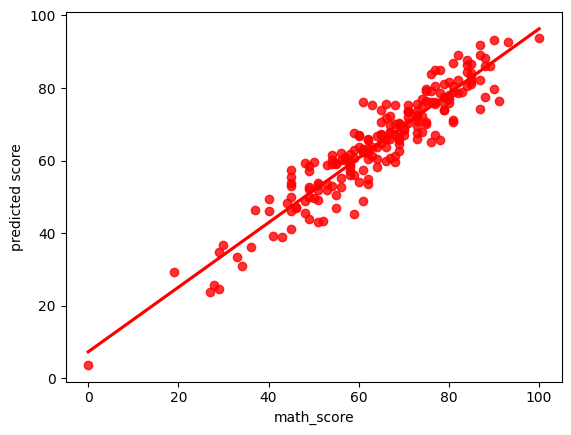

In [23]:
sns.regplot(x=y_test,y=y_predict,ci=None,color='red')
plt.ylabel('predicted score')

In [24]:
x_test.shape,x_test_scaled.shape

((200, 7), (200, 14))

In [25]:
y_test.shape,y_predict.shape

((200,), (200,))

In [26]:
x_train_scaled.shape,x_test_scaled.shape

((800, 14), (200, 14))

## difference between actual values and predicted vakues

In [27]:
diff_df=pd.DataFrame({'Acual Values':y_test,'Predicted values':y_predict,'diff':y_test-y_predict})
diff_df

,Acual Values,Predicted values,diff
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
